# Сборный проект 1

## Цель проекта:

    Проанализировать данные и выявить определяющие успешность игры закономерности. Выводы позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Входные данные:

    Данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы.

## План проекта:

### Этап 1. Получение данных

    - импортируем библиотеки
    - откроем файлы с данными
    - изучим общую информацию данных

### Этап 2. Подготовка данных

    - найдем и исправим ошибки
    - приведем данные к нужным типам
    - заменим/удалим/оставим пропуски
    - посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

### Этап 3. Анализ данных

    3.1. Посмотрим, сколько игр выпускалось в разные годы. 
        - Важны ли данные за все периоды?
    3.2. Посмотрим, как менялись продажи по платформам. 
        - Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 
        - За какой характерный срок появляются новые и исчезают старые платформы?
    3.3. Возьмем данные за соответствующий актуальный период. 
        - Нужно определить актульный период в результате исследования предыдущих вопросов. 
        - Основной фактор — эти данные помогут построить прогноз на 2017 год.
        - Учитывать в работе данные за предыдущие годы не нужно.
    3.4. Ответим на вопрос: Какие платформы лидируют по продажам, растут или падают? 
        - Выберем несколько потенциально прибыльных платформ.
    3.5. Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
    3.6. Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
        - Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 
        - Сформулируем выводы.
    3.7. Соотнесем выводы с продажами игр на других платформах.
    3.8. Посмотрим на общее распределение игр по жанрам. Ответим на вопросы:
        - Что можно сказать о самых прибыльных жанрах? 
        - Выделяются ли жанры с высокими и низкими продажами?.

### Этап 4. Составление портрета пользователя

    Определим для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5). Опишем различия в долях продаж.
    - Самые популярные жанры (топ-5). Поясним разницу.
    - Ответим на вопрос: влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Этап 5. Проверка гипотез

    Гипотезы:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    - Средние пользовательские рейтинги жанров Action и Sports разные

### Этап 6. Общие выводы

## Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Этап 1. Получение данных

In [377]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import seaborn as sb

from datetime import datetime
from scipy import stats as st
from matplotlib import cm

In [378]:
#загрузим данные
try: 
    data = pd.read_csv('/datasets/games.csv') #путь к файлу в общем хранилище
except: 
    data = pd.read_csv('C:/Users/Admin/Downloads/games.csv') #путь к файлу на локальной машине

In [379]:
data.head() #посмотрим на несколько строк данных

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [380]:
#посмотрим общую информацию
print('Общая информация')
print(data.info())
print('====================================')
print('Дубликатов в таблице:', data.duplicated().sum())
print('====================================')
print('Пропусков в таблице:')
print(data.isna().sum())
print('====================================')
print('Количество уникальных значений:')
print(data.nunique())

Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
Дубликатов в таблице: 0
Пропусков в таблице:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_

#### Выводы после предварительного просмотра данных:

- названия столбцов нужно привести к нижнему регистру
- данные столбца 'год выпуска' изменить на другой тип данных
- проверить пропущенные значения по столбцам, принять решение, что с ними делать

## Этап 2. Подготовка данных

In [381]:
data.columns #посмотрим на перечень названий столбцов

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [382]:
data.columns = data.columns.str.lower() #приведем названия столбцов к нижнему регистру

In [383]:
data.columns #проверим результат

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Данные с пропусками в столбце даты релиза придется удалить. Для анализа они бесполезны.

In [384]:
data = data.dropna(subset=['year_of_release']) #удаляем строки с пропусками по этому столбцу

In [385]:
data['year_of_release'].unique() #посмотрим на уникальные значения столбца с годами

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

In [386]:
#приведем тип данных к целочисленным 
data['year_of_release'] = data['year_of_release'].astype(int)

In [387]:
data.head() #проверим результат

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [388]:
#посмотрим на пропуски в названии игр
data[pd.isnull(data['name'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Всего две строки, в которых также пропущены данные в столбцах жанры, оценки и рейтинг. Можно эти строки удалить.

In [389]:
data = data.dropna(subset=['name']) #удаляем строки с пропусками по этому столбцу

In [390]:
data['name'].isna().sum() #проверим

0

In [391]:
#посмотрим уникальные значения по столбцам
for column in data.columns:
        print('Уникальные значения столбца', column)
        print(data[column].unique())
        print('====================================')

Уникальные значения столбца name
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
Уникальные значения столбца platform
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Уникальные значения столбца year_of_release
[2006 1985 2008 2009 1996 1989 1984 2005 1999 2007 2010 2013 2004 1990
 1988 2002 2001 2011 1998 2015 2012 2014 1992 1997 1993 1994 1982 2016
 2003 1986 2000 1995 1991 1981 1987 1980 1983]
Уникальные значения столбца genre
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
Уникальные значения столбца na_sales
[4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 9.000e+00 8.920e+00
 1.500e+01 9.010e+00 7.020e+

Есть значение 'tbd' в столбце user_score. Скорее всего, это значит To Be Determined, то есть "Будет определено".
Посмотрим сколько таких значений.

In [392]:
len(data[(data['user_score']== 'tbd')])

2376

Достаточно много значений, заменим их на пропуски.
Такие значения появились скорее всего, из-за несвоевременной оценки либо малом количестве оценок, ошибке при загрузке данных

In [393]:
#пропусков до
data['user_score'].isna().sum()

6605

In [394]:
#заменим 'tbd' на пропуски
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [395]:
#пропусков после
data['user_score'].isna().sum()

8981

In [396]:
#заменим пропуски в столбце на так называемую "заглушку"
data['user_score'] = data['user_score'].fillna(-10)

In [397]:
#поменяем тип данных
data['user_score'] = data['user_score'].apply(pd.to_numeric)

In [398]:
#проверим
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


In [399]:
#также заменим пропуски на "заглушку"
data['critic_score'] = data['critic_score'].fillna(-10)

In [400]:
#поменяем тип данных
data['critic_score'] = data['critic_score'].apply(pd.to_numeric)

In [401]:
#заменим пропуски в столбце рейтингов на 'unknown'
data['rating'] = data['rating'].fillna('unknown')

In [402]:
#проверим результат
data['rating'].value_counts()

unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

In [403]:
#проверим наличие пропусков после всех манипуляций
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

    Пропуски удалены/заполнены.
    Причин может быть несколько:
       - ошибка при загрузке данных разработчиками, данные с ошибками автоматом могли переформатироваться в пропуски
       - некоторые игры не проходили оценивание критиками/пользователями

In [404]:
#посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец
data['general_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-10.0,-10.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-10.0,-10.0,unknown,31.38


## Этап 3. Анализ данных

####    3.1. Посмотрим, сколько игр выпускалось в разные годы. 
        - Ответим на вопрос: Важны ли данные за все периоды?

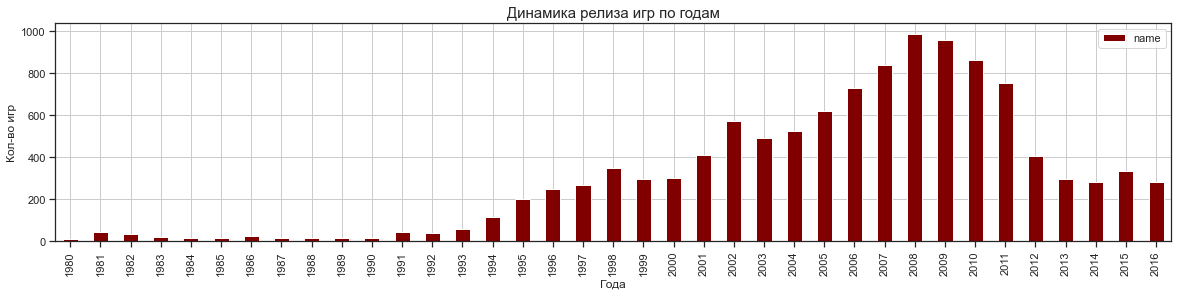

In [406]:
#посчитаем количество релизов за каждый год, одна игра - один релиз, без учета задвоений на несколько платформ
year_pivot = data
year_pivot['name'] = year_pivot['name'].drop_duplicates()
year_pivot = year_pivot.dropna(subset=['name'])
year_pivot= data.pivot_table(index='year_of_release', #посмотрим сводную по годам и количеству игр
                               values='name',
                               aggfunc='count')
year_pivot.plot(kind='bar', grid=True, figsize=(20,4), color = 'maroon')
plt.title('Динамика релиза игр по годам', fontsize=15)
plt.xlabel("Года")
plt.ylabel("Кол-во игр")
plt.show()

На графике представлена динамика релизов игр по годам. До 2008 года наблюдаем стремительный рост выпуска игр. После 2008 - резкий спад. Вероятно, это обусловлено началом массового распространения смартфонов и разработки игр на них.
Резкое падение количества выхода игр наблюдается в 2012 году и далее, с 2013-го, планомерный рост.
Так же резкое снижение количества релизов в 2012 году можно обьяснить сложностью и затратами на разработку игры. Игры в последние годы стали более сложнее, требовательнее к графике, сюжету. Акцент при разработке и релизе игр сместился на качество, а не количество.
За весь период данные не нужны, далеко прошедшее время уже неактуально для анализа и прогноза. 
Стоит посмотреть срок жизни платформ и динамику продаж игр на платформу по годам для определения актуального периода.

#### 3.2. Посмотрим, как менялись продажи по платформам. 
    - Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 
    - Ответим на вопрос: За какой характерный срок появляются новые и исчезают старые платформы?

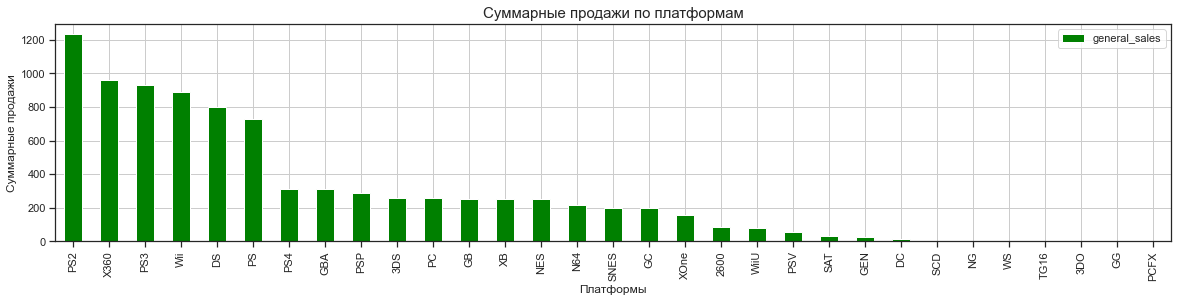

In [407]:
#посмотрим на топ-5 платформ по суммарным продажам
platform_sales = (data
                  .pivot_table(index=['platform'], values='general_sales', aggfunc='sum')
                  .sort_values('general_sales', ascending=False)
)

platform_sales.plot(kind='bar', grid=True, figsize=(20,4), color = 'green')
plt.title('Суммарные продажи по платформам', fontsize=15)
plt.xlabel("Платформы")
plt.ylabel("Суммарные продажи")
plt.show()

In [408]:
platform_sales = platform_sales.head(5)

In [409]:
top_platform = platform_sales.reset_index().platform.to_list()
top_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS']

Платформа PS2
                          general_sales
platform year_of_release               
PS2      2000                     39.17
         2001                    166.43
         2002                    205.38
         2003                    184.31
         2004                    211.81
         2005                    160.66
         2006                    103.42
         2007                     75.99
         2008                     53.90
         2009                     26.40
         2010                      5.64
         2011                      0.45
Платформа X360
                          general_sales
platform year_of_release               
X360     2005                      8.25
         2006                     51.62
         2007                     95.41
         2008                    135.26
         2009                    120.29
         2010                    170.03
         2011                    143.84
         2012                     99.74
         20

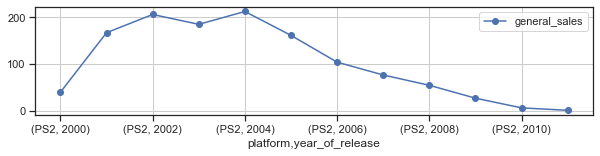

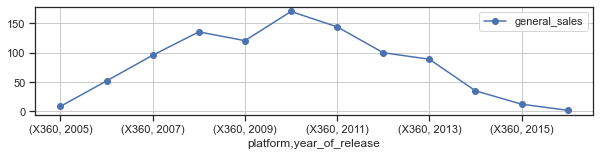

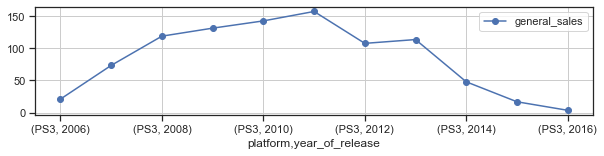

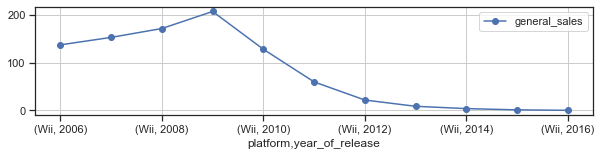

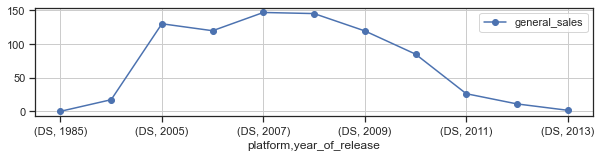

In [410]:
#посмотрим на динамику продаж по годам топ-5 платформ
for platform in top_platform:
    print('Платформа',platform)
    platform_sales = data.query('platform == @platform').pivot_table(index=['platform','year_of_release']
                                                                             , values='general_sales'
                                                                             , aggfunc='sum'
                                                                            )
    print(platform_sales)
    print('=======================================')
    platform_sales.plot(y='general_sales', grid=True, figsize=(10,2), style='o-')

На графиках видно, что средний срок жизни платформы около 10 лет. В первые 3-4 года идет рост продаж игр, дальше - снижение. То есть актуальный период для анализа данных и прогнозирования на 2017 год - это от 2013 по 2016 гг. включительно

#### 3.3. Возьмем данные за соответствующий актуальный период.

In [411]:
#создадим переменную со срезом данных актуального периода (после 2012 года)
data_actual = data.query('year_of_release >= 2013').reset_index(drop=True)
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,NaN,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-10.0,-10.0,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-10.0,-10.0,unknown,14.60
4,NaN,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [412]:
platform_actual = data_actual.groupby('platform')\
    .agg({'year_of_release':'count','general_sales':'sum'})
platform_actual = platform_actual.sort_values('general_sales', ascending=False).head(5)
platform_actual

,year_of_release,general_sales
platform,,
PS4,392,314.14
PS3,345,181.43
XOne,247,159.32
3DS,303,143.25
X360,186,136.80


In [413]:
top_list = platform_actual.reset_index().platform.to_list()
top_list

['PS4', 'PS3', 'XOne', '3DS', 'X360']

Пятерка самых прибыльных платформ изменилась

Платформа PS4
                          general_sales
platform year_of_release               
PS4      2013                     25.99
         2014                    100.00
         2015                    118.90
         2016                     69.25
Платформа PS3
                          general_sales
platform year_of_release               
PS3      2013                    113.25
         2014                     47.76
         2015                     16.82
         2016                      3.60
Платформа XOne
                          general_sales
platform year_of_release               
XOne     2013                     18.96
         2014                     54.07
         2015                     60.14
         2016                     26.15
Платформа 3DS
                          general_sales
platform year_of_release               
3DS      2013                     56.57
         2014                     43.76
         2015                     27.78
         2016          

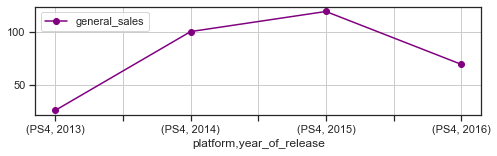

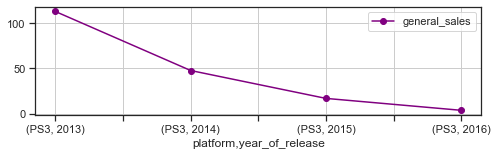

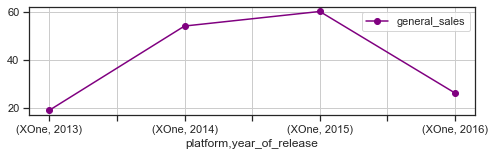

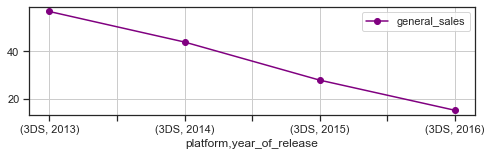

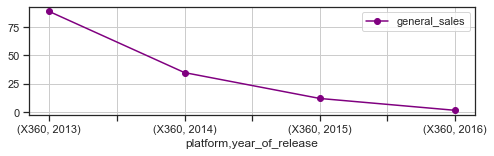

In [414]:
#посмотрим на динамику продаж по годам топ-5 платформ
for platform in top_list:
    print('Платформа',platform)
    platform_sales = data_actual.query('platform == @platform').pivot_table(index=['platform','year_of_release']
                                                                             , values='general_sales'
                                                                             , aggfunc='sum'
                                                                            )
    print(platform_sales)
    print('=======================================')
    platform_sales.plot(y='general_sales', grid=True, figsize=(8,2), style='o-', color = 'purple')

Так как за 2016 год данные представлены неполные, снижение динамики продаж в этом году при анализе учитывать нельзя. 
Исходя из этой логики, всего две платформы из пяти самых прибыльных показывают положительную динамику роста продаж, это - PS4 и XOne.
Данные платформы нового поколения, представлены на рынке недавно, в 2013 году, заменив своих предшественников.

Стоит посмотреть динамику продаж остальных платформ за актуальный период. Возможно у них продажи в сумме невысокие, но в перспективе имеют шанс вырасти.

In [415]:
#сгруппируем, создадим список оставшихся платформ
platform_two = data_actual.groupby('platform')\
    .agg({'year_of_release':'count','general_sales':'sum'})
platform_two = platform_two.sort_values('general_sales', ascending=True).head(6)
all_list = platform_two.reset_index().platform.to_list()
all_list

['DS', 'PSP', 'Wii', 'PSV', 'PC', 'WiiU']

Платформа DS
                          general_sales
platform year_of_release               
DS       2013                      1.54
Платформа PSP
                          general_sales
platform year_of_release               
PSP      2013                      3.14
         2014                      0.24
         2015                      0.12
Платформа Wii
                          general_sales
platform year_of_release               
Wii      2013                      8.59
         2014                      3.75
         2015                      1.14
         2016                      0.18
Платформа PSV
                          general_sales
platform year_of_release               
PSV      2013                     10.59
         2014                     11.90
         2015                      6.25
         2016                      4.25
Платформа PC
                          general_sales
platform year_of_release               
PC       2013                     12.38
         201

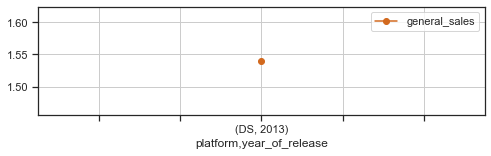

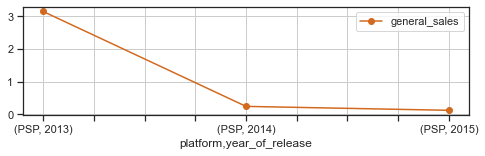

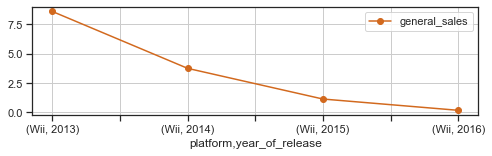

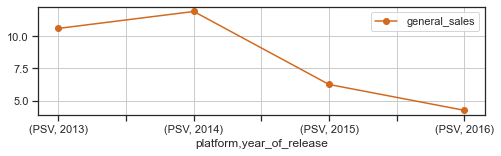

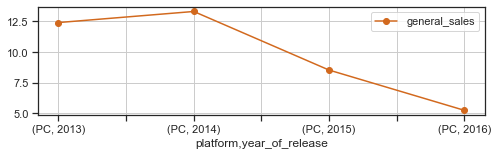

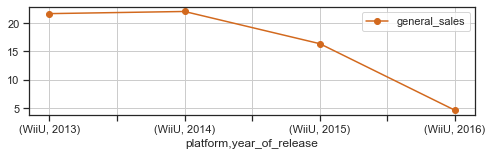

In [416]:
#посмотрим на динамику продаж по остальных платформ
for platform in all_list:
    print('Платформа',platform)
    platform_sales_two = data_actual.query('platform == @platform').pivot_table(index=['platform','year_of_release']
                                                                             , values='general_sales'
                                                                             , aggfunc='sum'
                                                                            )
    print(platform_sales_two)
    print('=======================================')
    platform_sales_two.plot(y='general_sales', grid=True, figsize=(8,2), style='o-', color = 'chocolate')

К сожалению предположение о наличии ещё перспективных платформ не подтвердилось. Остальные платформы показали на графиках уверенное падение продаж за актуальный период.

В итоге мы имеем две платформы: PS4 и XOne, которые показывают рост продаж за период 2013-2016 гг.

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [417]:
#сгруппируем платформы по годам и количеством продаж:
platform_plot = data_actual.groupby(['platform', 'year_of_release']).agg({'general_sales': 'count'}).reset_index()
platform_plot

,platform,year_of_release,general_sales
0,3DS,2013,91
1,3DS,2014,80
2,3DS,2015,86
3,3DS,2016,46
4,DS,2013,8
5,PC,2013,38
6,PC,2014,47
7,PC,2015,50
8,PC,2016,54
9,PS3,2013,126


(0.0, 170.0)

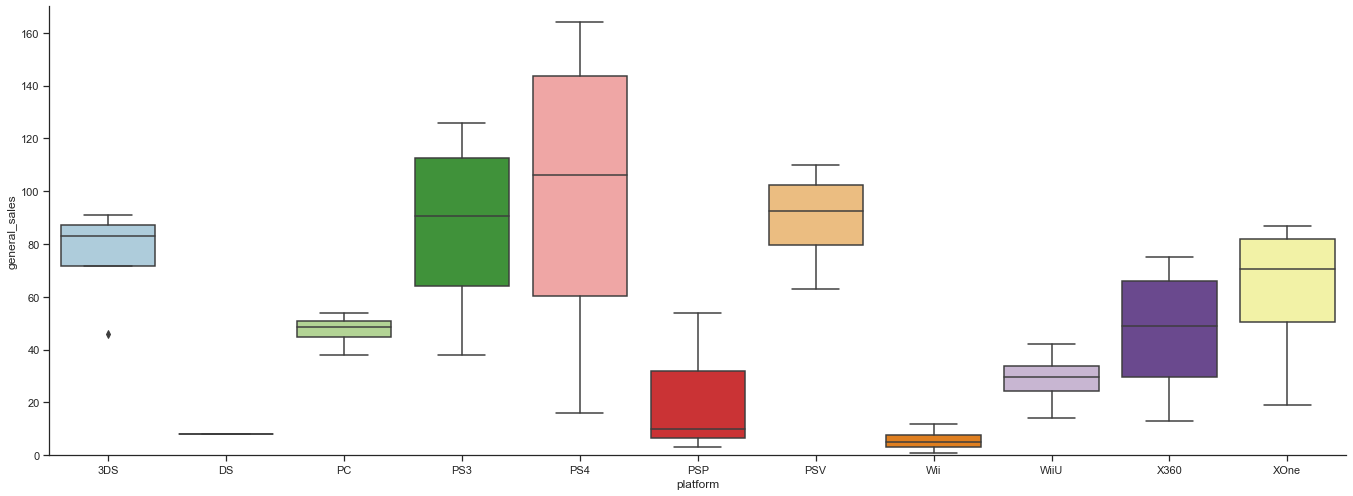

In [418]:
#построим "ящики с усами" для каждой платформы
sns.catplot(x="platform", 
            y='general_sales', 
            kind="box", 
            data=platform_plot, 
            orient='v', 
            height=7, 
            aspect=2.7, 
            palette='Paired')
plt.ylim(0, 170)

Исходя из графика распределения количества продаж по платформам лидирует "PS4". Большое количество продаж и у её предшественницы - "PS3". Та же ситуация у платформ "XOne" и "X360". Это обусловленно "переходным" периодом между старой и новой платформами. Старая ещё пользуется спросом, пока новая не набрала популярность.
Так же в лидерах по количеству продаж игр платформы "PSV" и "3DS". Данные платформы являются портативными и стоЯт немного особняком от консольных. При детальном прогнозе рекламной кампании нужно учесть данное отличие двух видов платформ.

#### 3.6. Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

Посмотрим на зависимость продаж от оценок пользователей и критиков на примере платформы PS4

In [419]:
#создадим переменную со срезом данных без выбросов ('заглушек')
data_corr = data_actual.query('user_score >= 0 and critic_score >= 0')

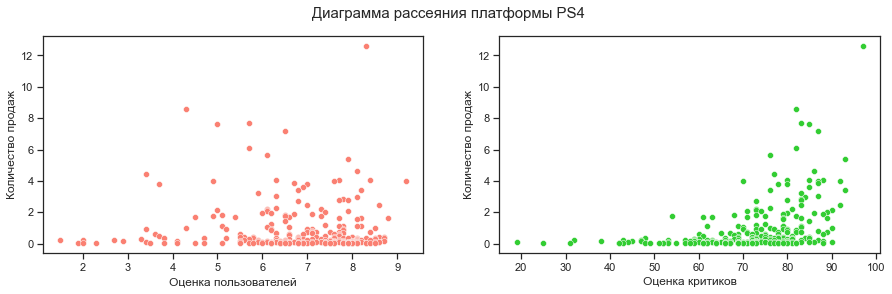

Корреляция между отзывами критиков и продажами: 0.40589480145836687
Корреляция между отзывами пользователей и продажами: -0.03362497596528878


In [420]:
#Построим парную диаграмму рассеяния по оценкам критиков, пользователей к продажам 
ps_four_corr = data_corr.query('platform == "PS4"')
fig, ax = plt.subplots(1 ,2, figsize=(15,4))
sns.scatterplot(x='user_score', y='general_sales', data=ps_four_corr, ax=ax[0], color = 'salmon')
sns.scatterplot(x='critic_score', y='general_sales', data=ps_four_corr, ax=ax[1], color = '#32CD32')
fig.suptitle('Диаграмма рассеяния платформы PS4', fontsize=15)
ax[0].set(xlabel='Оценка пользователей')
ax[1].set(xlabel='Оценка критиков')
ax[0].set(ylabel='Количество продаж')
ax[1].set(ylabel='Количество продаж')
plt.show()  
user_corr = ps_four_corr['user_score'].corr(ps_four_corr['general_sales'])
critic_corr = ps_four_corr['critic_score'].corr(ps_four_corr['general_sales'])
print('Корреляция между отзывами критиков и продажами:', critic_corr)
print('Корреляция между отзывами пользователей и продажами:', user_corr)

    Высокие оценки критиков могут повлиять на показатели по продажам, есть небольшая положительная корреляция.
    Корреляция между продажами и оценками пользователей практически отсутствует

#### 3.7. Соотнесем выводы с продажами игр на других платформах.

In [421]:
#возьмем наш список топ-5 платформ, исключив из него платформу PS4
top_list = top_list[1:]
top_list

['PS3', 'XOne', '3DS', 'X360']

In [422]:
#создадим функцию для формирования парных диаграмм рассеяния остальных 4-х лучших платформ
def corr_function(name_platform):
    platform = data_corr[data_corr['platform']==name_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,4))
    sns.scatterplot(x='user_score', y='general_sales', data=platform, ax=ax[0], color = 'salmon')
    sns.scatterplot(x='critic_score', y='general_sales', data=platform, ax=ax[1], color = '#32CD32')
    fig.suptitle(name_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    user_corr = platform['user_score'].corr(platform['general_sales'])
    critic_corr = platform['critic_score'].corr(platform['general_sales'])
    print('Корреляция между отзывами критиков и продажами', critic_corr)
    print('Корреляция между отзывами пользователей и продажами', user_corr)

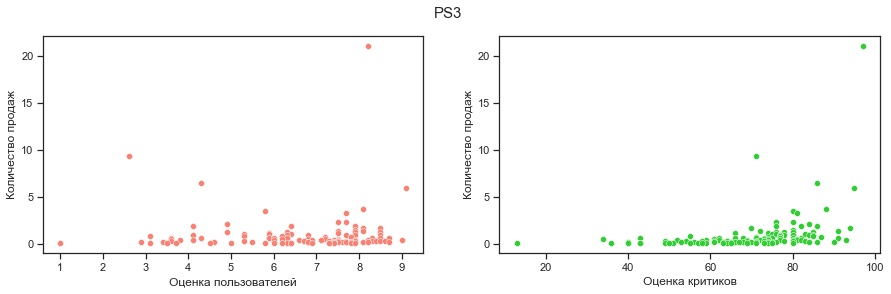

Корреляция между отзывами критиков и продажами 0.33380663565061736
Корреляция между отзывами пользователей и продажами 0.02269094327112414


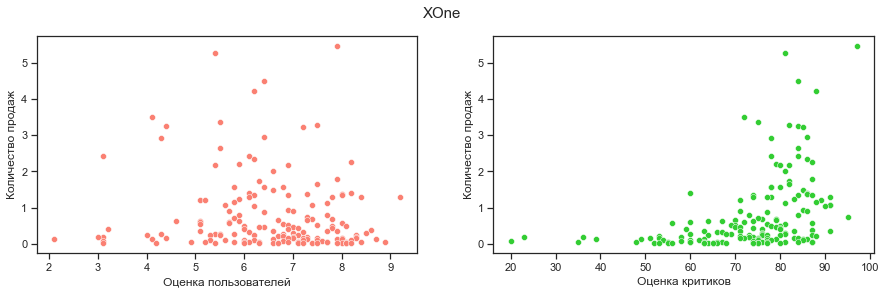

Корреляция между отзывами критиков и продажами 0.41042203561296375
Корреляция между отзывами пользователей и продажами -0.09400318326920852


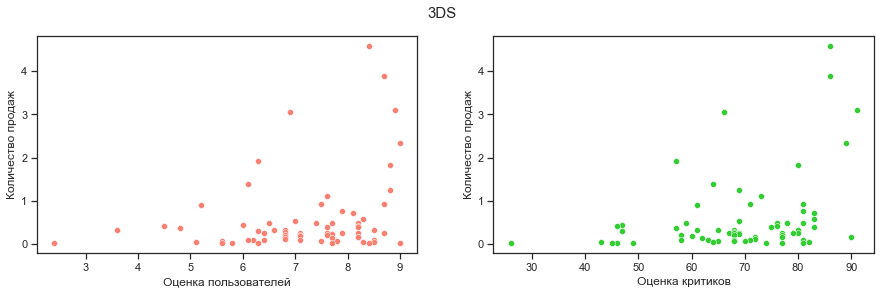

Корреляция между отзывами критиков и продажами 0.3392349287853147
Корреляция между отзывами пользователей и продажами 0.2729904366942444


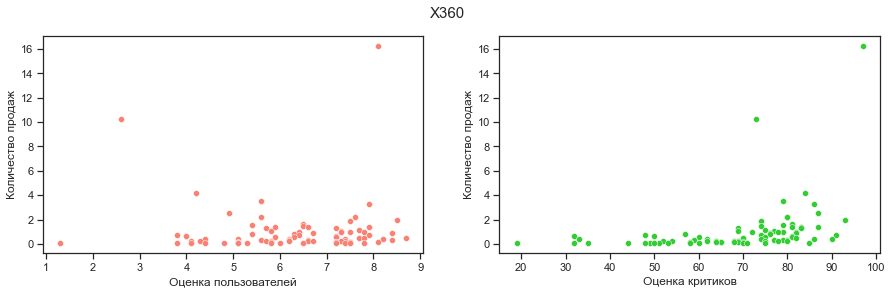

Корреляция между отзывами критиков и продажами 0.3503445460228664
Корреляция между отзывами пользователей и продажами -0.006238179532306317


In [423]:
#применим цикл для функции
for platform in top_list:
    corr_function(platform)

По остальным 4-м самым популярным платформам корреляции между отзывами и продажами схожи: оценки критиков имеют небольшую положительную корреляцию, корреляция оценки пользователей - близка к нулю

In [424]:
#посмотрим общую корреляцию продаж и оценок
(data_corr
 .loc[:,['general_sales', 'critic_score', 'user_score']]
 .corr()
)

,general_sales,critic_score,user_score
general_sales,1.000000,0.311692,-0.004064
critic_score,0.311692,1.000000,0.502221
user_score,-0.004064,0.502221,1.000000


В среднем по датафрейму корреляция положительная, но небольшая. Есть небольшая зависимость от оценок критиков, вероятно, что авторитетные издания и экспертные геймеры делая оценку или обзор могут незначительно повлиять на динамику продаж игр, к их мнению игроки прислушиваются. Оценки же пользователей по сути не влияют на объем продаж. 

#### 3.8. Посмотрим на общее распределение игр по жанрам. Ответим на вопросы:
    - Что можно сказать о самых прибыльных жанрах? 
    - Выделяются ли жанры с высокими и низкими продажами?.

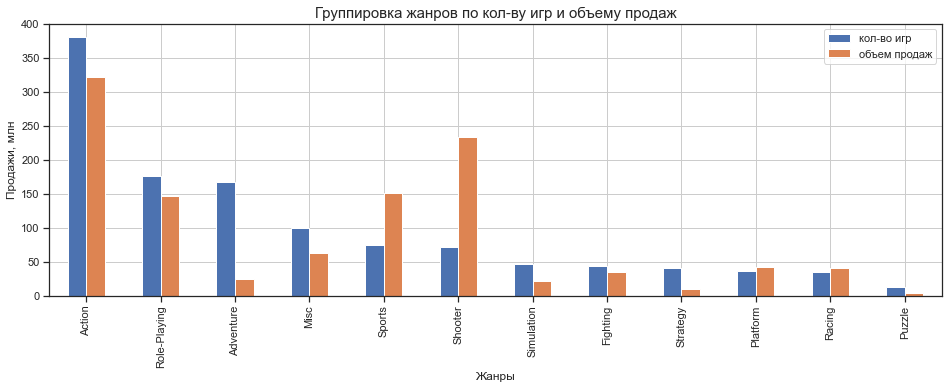

,кол-во игр,объем продаж
genre,,
Action,381,321.87
Role-Playing,176,145.89
Adventure,167,23.64
Misc,99,62.82
Sports,74,150.65
Shooter,72,232.98
Simulation,47,21.76
Fighting,43,35.31
Strategy,41,10.08


In [425]:
#сгруппируем жанры по количеству игр и объему продаж, построим гистограмму
genre_sales = data_actual.groupby('genre')\
                  .agg({'name':'count', 'general_sales':'sum'})\
                  .sort_values(by='name', ascending=False)\
                  .rename(columns={'name':'кол-во игр','general_sales':'объем продаж'})
genre_sales.plot(kind='bar', legend=True, grid=True, figsize=(16,5))
plt.title('Группировка жанров по кол-ву игр и объему продаж', fontsize=15)
plt.xlabel("Жанры")
plt.ylabel("Продажи, млн")
plt.show()
genre_sales

Жанр игр Action имеет наибольшее количество игр и объем продаж. В целом соотношение количества игр и выручки совпадает у большинства жанров. Есть исключения: жанр "шутер" имеет чуть больше 187 выпущенных игр, находится на втором месте по объемам продаж.
Жанр "Adventure" наоборот находясь на 3-м месте по числу игр (245 игр) имеет очень низкие продажи.

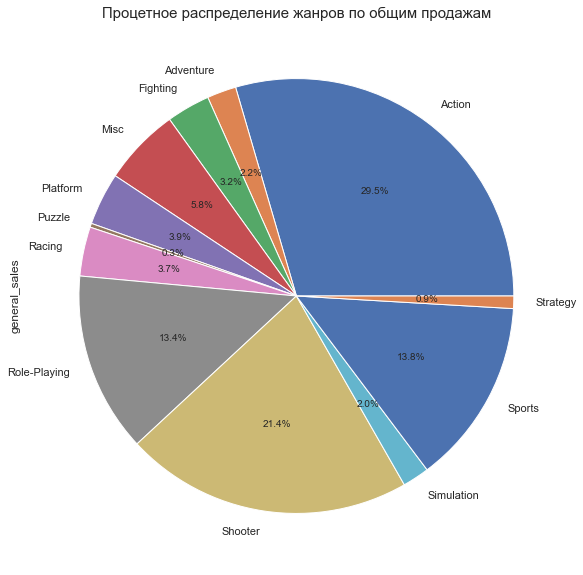

In [426]:
data_actual.groupby('genre')['general_sales'].sum().plot.pie(figsize=(10,10), autopct='%.1f%%')
plt.title('Процетное распределение жанров по общим продажам', fontsize=15)
plt.show()

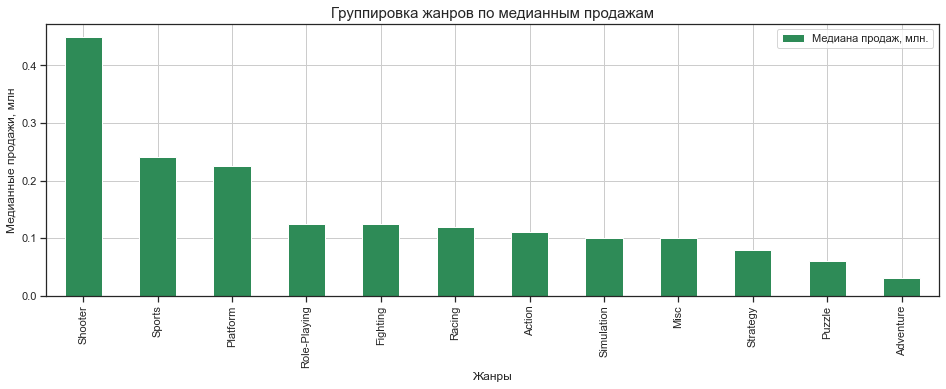

,"Медиана продаж, млн."
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


In [427]:
#сгруппируем жанры по медианным продажам, построим гистограмму
genre_median = data_actual.groupby('genre')\
                  .agg({'general_sales':'median'})\
                  .sort_values(by='general_sales', ascending=False)\
                  .rename(columns={'general_sales':'Медиана продаж, млн.'})
genre_median.plot(kind='bar', legend=True, grid=True, color= '#2E8B57', figsize=(16,5))
plt.title('Группировка жанров по медианным продажам', fontsize=15)
plt.xlabel("Жанры")
plt.ylabel("Медианные продажи, млн")
plt.show()
genre_median

Сортировка жанров по медианным продажам дала немного другие результаты:
 - Лидер по общим продажам 'Action' сместился в середину списка. Вероятно, что большие общие продажи зависят от огромного количества выпускаемых игр этого жанра.
 - Жанры 'Shooter', 'Sports' и 'Role-Playing' занимают лидирующие позиции как по медианным продажам, так и по общим.
 - Неожиданностью стал жанр 'Platform' - при небольшом количестве выпущенных игр за актуальный период - 36, при 4% от общего объема продаж, медианная выручка составляет 0,225 млн.копий.

## Этап 4. Составление портрета пользователя

    Определим для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5). Опишем различия в долях продаж.
    - Самые популярные жанры (топ-5). Поясним разницу.
    - Ответим на вопрос: влияет ли рейтинг ESRB на продажи в отдельном регионе?

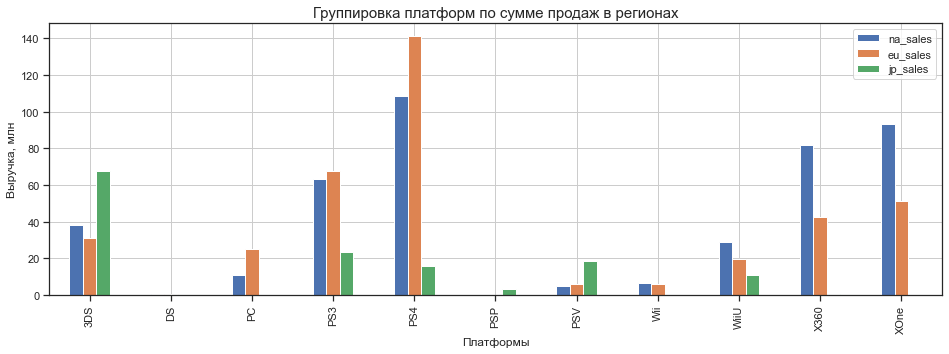

,na_sales,eu_sales,jp_sales
platform,,,
3DS,38.20,30.96,67.81
DS,0.57,0.85,0.00
PC,11.11,25.36,0.00
PS3,63.50,67.81,23.35
PS4,108.74,141.09,15.96
PSP,0.00,0.17,3.29
PSV,5.04,6.10,18.59
Wii,6.56,5.93,0.05
WiiU,29.21,19.85,10.88


In [428]:
sales_table = data_actual.groupby('platform')\
                  .agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'})

sales_table.plot(kind='bar', legend=True, grid=True, figsize=(16,5))
plt.title('Группировка платформ по сумме продаж в регионах', fontsize=15)
plt.xlabel("Платформы")
plt.ylabel("Выручка, млн")
plt.show()
sales_table

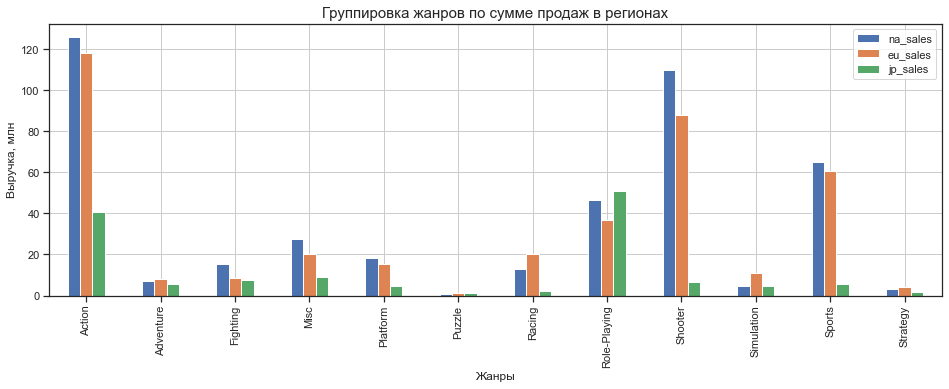

,na_sales,eu_sales,jp_sales
genre,,,
Action,126.05,118.13,40.49
Adventure,7.14,8.25,5.82
Fighting,15.55,8.55,7.65
Misc,27.49,20.04,9.20
Platform,18.14,15.58,4.79
Puzzle,0.83,1.00,1.18
Racing,12.96,20.19,2.30
Role-Playing,46.40,36.97,51.04
Shooter,109.74,87.86,6.61


In [429]:
genre_table = data_actual.groupby('genre')\
                  .agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'})

genre_table.plot(kind='bar', legend=True, grid=True, figsize=(16,5))
plt.title('Группировка жанров по сумме продаж в регионах', fontsize=15)
plt.xlabel("Жанры")
plt.ylabel("Выручка, млн")
plt.show()
genre_table

In [430]:
#напишем функцию для сортировки и построения графиков
def region_plot(df):
    i = 1
    for index in df.columns[0:3]:
        df[index].sort_values(ascending=False)[0:5].plot(kind='pie'
                                                         , autopct='%.1f%%'
                                                         , ax=plt.subplot(1,3,i)
                                                         , figsize=(20,5))
        i += 1
        plt.title(index, fontsize=15)

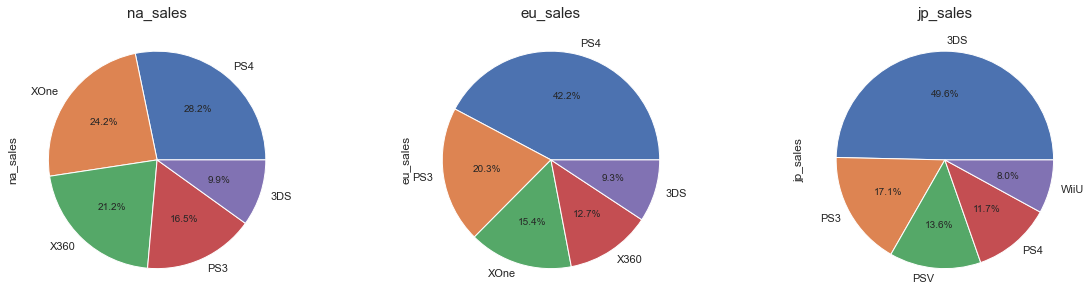

In [431]:
region_plot(sales_table) #посмотрим на топ-5 платформ в разных регионах

In [432]:
#сформируем таблицу топ-5 платформ по регионам
platform_top_world = pd.DataFrame(data={'Европа':sales_table['eu_sales'].sort_values(ascending=False).index
                                          , 'Северная Америка':sales_table['na_sales'].sort_values(ascending=False).index
                                          , 'Япония':sales_table['jp_sales'].sort_values(ascending=False).index}
                                          , index=range(1,12))
platform_top_world.head(5)

,Европа,Северная Америка,Япония
1,PS4,PS4,3DS
2,PS3,XOne,PS3
3,XOne,X360,PSV
4,X360,PS3,PS4
5,3DS,3DS,WiiU


Пятерка самых популярных платформ в Северной Америке и Европе одинакова, разница небольшая.
Япония отличается своим выбором пяти самых популярных платформ от остального мира, на первом месте рейтинга платформа, занимающая в Европе и Америке всего лишь пятое место. 

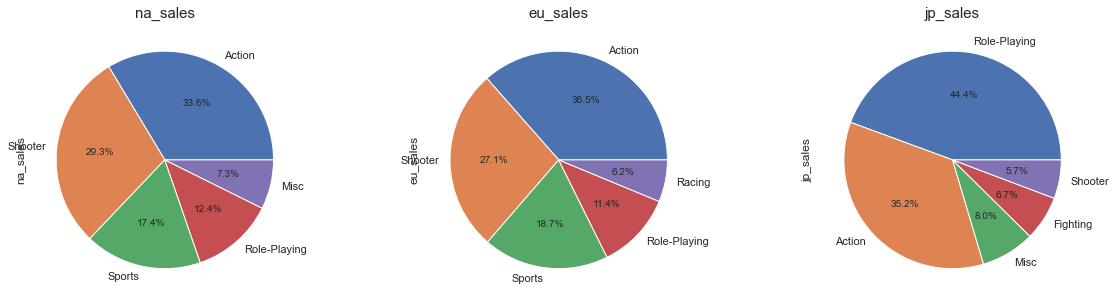

In [433]:
region_plot(genre_table) #посмотрим на топ-5 жанров в разных регионах

In [434]:
#сформируем таблицу топ-5 жанров по регионам
genre_top_world = pd.DataFrame(data={'Европа':genre_table['eu_sales'].sort_values(ascending=False).index
                                          , 'Северная Америка':genre_table['na_sales'].sort_values(ascending=False).index
                                          , 'Япония':genre_table['jp_sales'].sort_values(ascending=False).index}
                                          , index=range(1,13))
genre_top_world.head(5)

,Европа,Северная Америка,Япония
1,Action,Action,Role-Playing
2,Shooter,Shooter,Action
3,Sports,Sports,Misc
4,Role-Playing,Role-Playing,Fighting
5,Racing,Misc,Shooter


#### Выводы:
    С жанрами игр распределение по регионам практически такое же как и платформ. 
    В Америке и Европе 5-ка самых популярных практически идентична, разница невелика. 
    В Японии предпочтение отдают другим жанрам игр. 
    Скорее всего различия в выборе платформ и жанров восточной Японии и западных Европы и Америки объясняются 
    ментальностью разных культур

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> Молодец, так и есть японцы отличаются от европейцев и американцев культурой.</div>


#### Влияние рейтинга ESRB на продажи в отдельном регионе

Классификация рейтингов ESRB:
- EC = Для детей младшего возраста. Подходит для детей от 3 лет.
- E = Подходит для всех возрастных категорий.
- E10+ = Подходит для лиц старше 10 лет.
- T = Подходит для лиц старше 13 лет.
- M = Подходит для лиц старше 17 лет.
- AO = Подходит для взрослых старше 18 лет.
- RP = Категория ещё не присвоена.

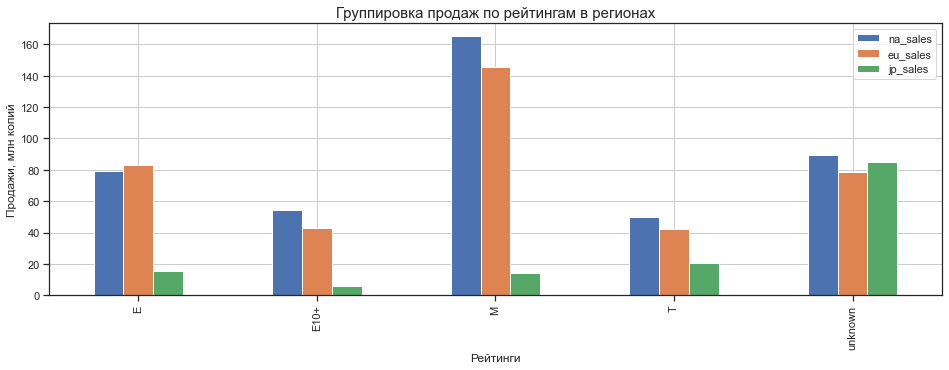

,na_sales,eu_sales,jp_sales
rating,,,
E,79.05,83.36,15.14
E10+,54.24,42.69,5.89
M,165.21,145.32,14.11
T,49.79,41.95,20.59
unknown,89.42,78.91,85.05


In [435]:
genre_table = data_actual.groupby('rating')\
                  .agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'})

genre_table.plot(kind='bar', legend=True, grid=True, figsize=(16,5))
plt.title('Группировка продаж по рейтингам в регионах', fontsize=15)
plt.xlabel("Рейтинги")
plt.ylabel("Продажи, млн копий")
plt.show()
genre_table

Очень много игр с неизвестным рейтингом. В Японии это половина игр в нашей выборке. Посмотрим на распределение рейтингов по жанрам.

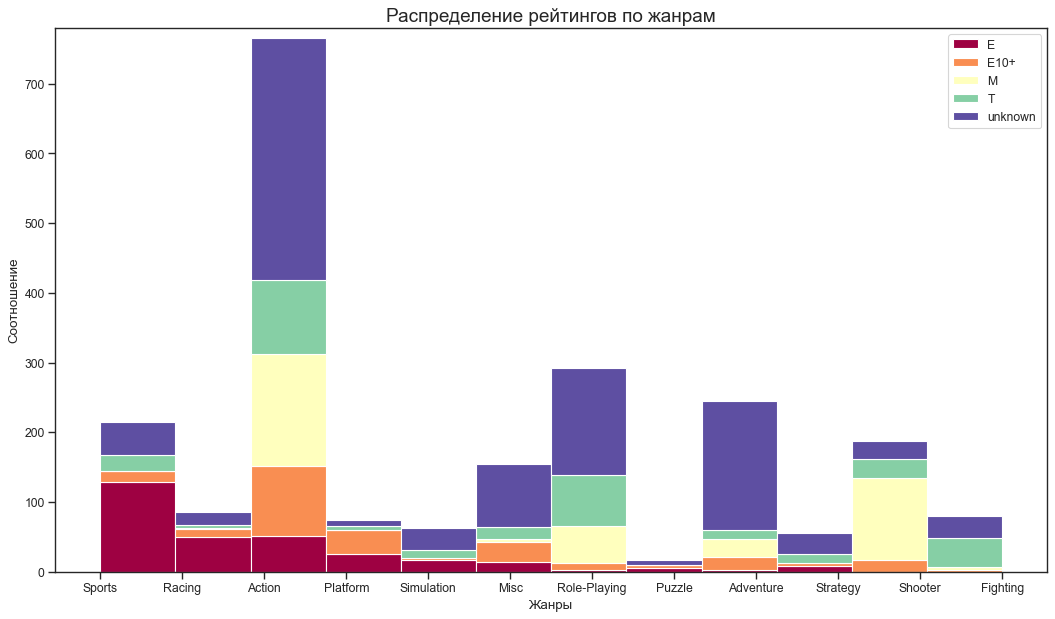

In [436]:
#посмотрим на гистограмму для категориальной переменной
rating_genre = data_actual.loc[:, ['genre', 'rating']].groupby('rating')
dff = [data_actual['genre'].values.tolist() for i, data_actual in rating_genre]

plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(dff)-1)) for i in range(len(dff))]
n, bins, patches = plt.hist(dff, data_actual['genre'].unique().__len__(), stacked=True, density=False, color=colors[:len(dff)])

plt.legend({group:col for group, col in zip(np.unique(data_actual['rating']).tolist(), colors[:len(dff)])})
plt.title("Распределение рейтингов по жанрам", fontsize=17)
plt.xlabel("Жанры")
plt.ylabel("Соотношение")
plt.ylim(0, 780)
plt.show()

    В нашей выборке, очень большой процент игр без определенного рейтинга. Львиная доля продаж в Японии как раз приходится 
    на игры без рейтинга, в Европе и Америке - это четверть.
    Если не учитывать эти пропущенные значения в рейтингах, то:
    В Европе и Америке самые продаваемые игры категории "M" - 'для взрослых'.
    В Японии самые продаваемые игры категории "T" - 'подросткам'

## Этап 5. Проверка гипотез

    Гипотезы:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    - Средние пользовательские рейтинги жанров Action и Sports разные

#### 5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем основную и альтернативную гипотезы:
* H₀ - средние значения пользовательского рейтинга платформ Xbox One и PC равны
* H₁ - средние значения пользовательского рейтинга платформ Xbox One и PC не равны

Создадим две переменные и сохраним в них срезы по платформам

In [437]:
#Переменная со срезом платформы Xbox One
data_x_one = data_actual.query('platform == "XOne" and user_score >= 0')
data_x_one.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
22,NaN,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
24,NaN,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26


In [438]:
#Переменная со срезом платформы PC
data_pc = data_actual.query('platform == "PC" and user_score >= 0')
data_pc.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
73,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
157,StarCraft II: Heart of the Swarm,PC,2013,Strategy,0.83,0.66,0.0,0.18,86.0,7.9,T,1.67


In [441]:
#специальным методом проверим гипотезу о равенстве среднего двух генеральных совокупностей
alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(
    data_x_one['user_score'], 
    data_pc['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Вероятность получить равнозначность средних значений в двух выборках = 14%
Нулевая гипотеза вероятна.

In [442]:
print('Средняя оценка пользователей платформы Xbox One:', data_x_one['user_score'].mean())
print('Средняя оценка пользователей платформы PC      :', data_pc['user_score'].mean())

Средняя оценка пользователей платформы Xbox One: 6.52142857142857
Средняя оценка пользователей платформы PC      : 6.269677419354836


#### 5.1. Средние пользовательские рейтинги жанров Action и Sports разные

Сформулируем основную и альтернативную гипотезы:
* H₀ - средние значения пользовательского рейтинга жанров Action и Sports равны
* H₁ - средние значения пользовательского рейтинга жанров Action и Sports не равны

Создадим две переменные и сохраним в них срезы по жанрам

In [443]:
#Переменная со срезом жанра "Action"
data_action = data_actual.query('genre == "Action" and user_score >= 0')
data_action.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,NaN,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27


In [444]:
#Переменная со срезом жанра "Sports"
data_sports = data_actual.query('genre == "Sports" and user_score >= 0')
data_sports.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
9,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
12,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60


In [445]:
#специальным методом проверим гипотезу о равенстве среднего двух генеральных совокупностей
alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(
    data_action['user_score'], 
    data_sports['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Средние оценки пользователей двух жанров разнятся. Вероятности получить одинаковые средние значения рейтингов по этим двум жанрам практически нет.

In [446]:
print('Средняя оценка пользователей жанра Action:', data_action['user_score'].mean())
print('Средняя оценка пользователей жанра Sports:', data_sports['user_score'].mean())

Средняя оценка пользователей жанра Action: 6.837532133676097
Средняя оценка пользователей жанра Sports: 5.238124999999999


Гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - нулевую гипотезу отвергнуть не удалось
* Средние пользовательские рейтинги жанров Action и Sports разные - отвергаем нулевую гипотезу

## Этап 6. Общие выводы

#### 1. На этапе получения данных:
 * загрузили файл данных
 * импортировали библиотеки, необходимые для работы
 * предварительно ознакомились с данными, наметили дальнейшие действия для предобработки

#### 2. На этапе подготовки и обработки данных провели следующие работы:
   * заменили регистр наименований столбцов на нижний
   * удалили пропуски в столбце с годами (с пропусками эти данные для анализа не нужны)
   * заменили тип данных значения лет на целочисленный
   * заменили значения 'tbd' в оценках пользователей на пропуски (для анализа эти пропуски могут дать ошибки)
   * добавили к датафрейму столбец с сумарными продажами всех регионов

#### 3. На этапе анализа данных выяснили:
   * сколько игр выпускалось в каждом году. Увидели динамику выпуска игр.
   * выбрали топ-5 платформ по продажам за всё время, построили распределение по годам.
   * определили срок жизни платформы = 10 лет. Срок роста продаж игр на платформу = 3-4 года.
   * определили актуальный период для прогнозирования потенциально популярного продукта на 2017 год = 2013-2016 гг.
   * выделили топ-5 платформ за актуальный период, определили потенциальные платформы для роста продаж
   * построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
   * определили влияние на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построили диаграмму    рассеяния и посчитали корреляцию между отзывами и продажами
   * посмотрели на общее распределение игр по жанрам

3.1. Из пяти самых прибыльных за актуальный период, две платформы показывают положительную динамику роста продаж:
   * PS4
   * XOne

Данные платформы нового поколения, представлены на рынке недавно, в 2013 году, заменив своих предшественников.
Показывают стабильный рост продаж, прогноз роста на 2017 год положительный.

3.2. Влияние оценок на продажу игр:
   * Оценки критиков незначительно влияют на показатели по продажам. Корреляция = 0.4
   * Оценки пользователей не влияют на продажи. Корреляция = -0.03

3.3. Распределение игр по жанрам:

По общим продажам:
 * Action = 29.5% от общих продаж
 * Shooter = 21.4% от общих продаж
 * Sports = 13.8% от общих продаж

По медианным продажам:
 * Shooter = 0.450 млн.копий
 * Sports = 0.240 млн.копий
 * Platform = 0.225 млн. копий

#### На этапе составления портрета пользователя выяснили:

Топ-5 самых популяных платформ по регионам

Европа:
1. PS4
2. PS3
3. XOne
4. X360
5. 3DS

Северная Америка:
1. PS4
2. XOne
3. X360
4. PS3
5. 3DS

Япония:
1. 3DS
2. PS3
3. PSV
4. PS4
5. WiiU

Топ-5 самых популяных жанров по регионам

Европа:
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Racing

Северная Америка:
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Misc

Япония:
1. Role-Playing
2. Action
3. Misc
4. Fighting
5. Shooter

Вероятно, что различия в выборе платформ и жанров игр в Японии и в Европе и Америке объясняются 
ментальностью разных восточной и западной культур

Рейтинг ESRB на продажи в отдельном регионе влияет:
* В Европе и Америке самые продаваемые игры категории "M" - 'для взрослых'.
* В Японии самые продаваемые игры категории "T" - 'для подростков'

Большой процент игр без рейтинга, искажает объективную оценку влияния рейтинга на продажи

#### На этапе проверки гипотез определили:

Гипотезы:

##### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - нулевую гипотезу отвергнуть не удалось
    Вероятность получить равнозначность средних значений в двух выборках = 14%

##### Средние пользовательские рейтинги жанров Action и Sports разные - отвергаем нулевую гипотезу
    Средние оценки пользователей двух жанров разнятся

#### Вывод для прогноза на 2017 год:

Для прогнозирования потенциально популярного продукта и планирования рекламных кампаний на 2017 год, необходимо учитывать региональность: Европа и Америка в предпочтениях похожи. Япония выделяется в связи с культурной обособленностью.

При выборе перспективно прибыльных платформ обращать внимание на последние разработанные. В нашем случае это PS4 и XOne. Запас времени для роста продаж у них ещё есть.

Обратить внимание на медианные продажи по жанрам, целесообразнее акцентировать внимание на жанры игр со стабильным доходом. В связке с популярной перспективной платформой это может дать прибыльный результат.

# Общие замечания ревьюера, которые надо исправить


- проанализировать столбцы rating и critic_score
- выполнить пункт "Соотнесите выводы с продажами игр на других платформах."
- перепроверить гипотезы
- построить правильный график «ящик с усами» по глобальным продажам игр в разбивке по платформам